In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
def make_hello(N=10000, rseed=42):
    fig, ax = plt.subplots(figsize=(20, 2))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'Please, Vic❀', va = 'center', ha = 'center', weight='bold', size=100)
    fig.savefig('hello.png')
    plt.close(fig)
    
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(2.3939400023611883,
 7.6325792845500153,
 0.0666195649007508,
 0.77486017393706563)

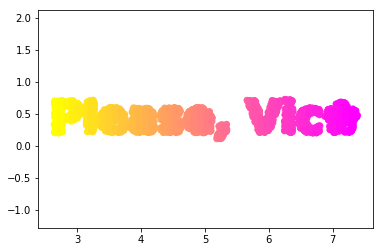

In [61]:
X = make_hello(5000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('spring_r',50))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

(7.0098248662698834, 12.016396484657898, 5.987594919745832, 8.2084506155253596)

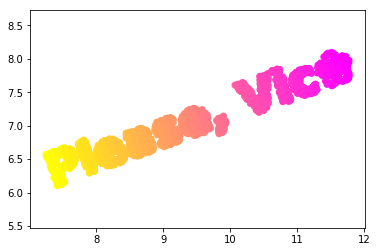

In [69]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [66]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(2151, 2151)

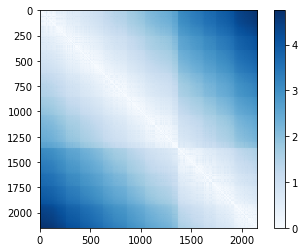

In [67]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [70]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)

True

(-0.70395120197819638,
 0.75849837424540778,
 -2.707996820760382,
 2.4875644660070635)

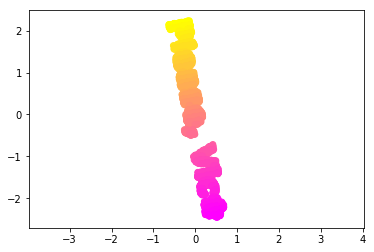

In [71]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

In [72]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(2151, 3)

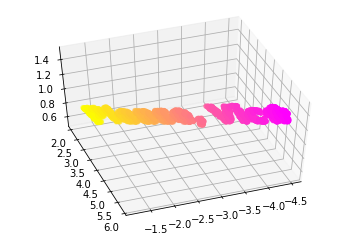

In [73]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
            **colorize)
ax.view_init(azim=70, elev=50)

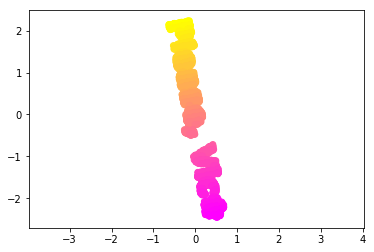

In [74]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [77]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

In [78]:
print(XS)

[[ 0.99817483  0.33973271 -0.93960951]
 [ 0.99850432  0.33589827 -0.94532707]
 [ 0.99880434  0.21005292 -0.95111357]
 ..., 
 [ 0.09466527  0.47601813 -0.00449084]
 [ 0.09804641  0.45221794 -0.00481816]
 [ 0.12260261  0.47935229 -0.00754416]]


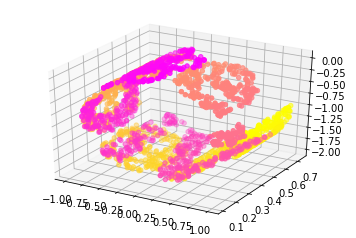

In [80]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
            **colorize)

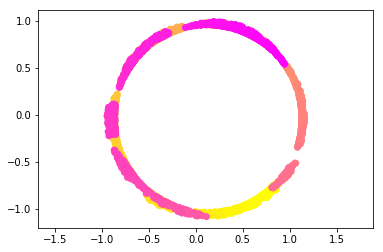

In [82]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

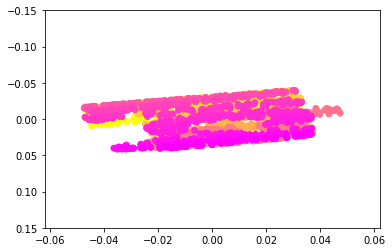

In [84]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                              eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);